In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
%matplotlib inline

In [300]:
df_county = pd.read_csv("df_county.csv")
df_county = df_county.drop(columns=['Unnamed: 0','county','Pop.Density','Pop.Density.Normalized','FIPS'])
df_county.columns = df_county.columns.str.replace('.','_')
X = df_county.iloc[:,1:28]
y = np.array(df_county.iloc[:,0]).reshape(-1,1)

### Histogram of the Number of Stores in Each County

(array([19.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  5.1,  9.2, 13.3, 17.4, 21.5, 25.6, 29.7, 33.8, 37.9, 42. ]),
 <a list of 10 Patch objects>)

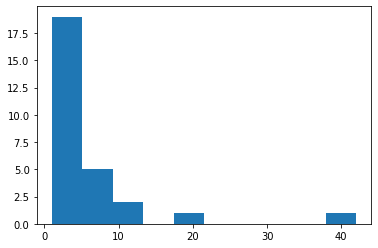

In [5]:
plt.hist(df_county['num_stores'])

The number of stores in each county seems to follow a Poisson distribution.

### Examining Residuals for the Linear Model

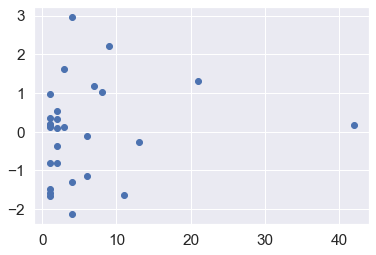

In [233]:
plt.scatter(y=est.resid,x = y)

It is clear that the residuals (squared distance between the predicted Y value and the actual Y value) decrease as the actual y values increase. In other words, there's less variation in the number of stores between counties the more stores they have.

## Linear Regression

In [301]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     57.66
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.61e-10
Time:                        23:14:02   Log-Likelihood:                -45.137
No. Observations:                  28   AIC:                             116.3
Df Residuals:                      15   BIC:                             133.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Findings
- R_squared of 0.979 means 97.9% of the variance in the number of stores is explained by our explanatory variables.
- Out of all variables, the following are variables that are statistically significant*:
    - Household
    - Single Detached
    - Single Attached
    - Five Plus
    - Mobile Homes
    - Persons per Household

*Assuming that the variable does not determine the number of stores, it is very unlikely that we will obtain the results at least as extreme as the results actually observed in the data.

### K-Fold Cross Validation

#### Linear Regression

In [374]:
folds = KFold(n_splits=4)
linear_scores = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], \
                                       y[train_index], y[test_index]
    y_pred = LinearRegression().fit(X_train,y_train).predict(X_test).astype(int)
    linear_scores.append(accuracy_score(y_test,y_pred))
    
print("Accuracy Score:",np.mean(linear_scores))

Accuracy Score: 0.03571428571428571


#### Poisson Regression

In [375]:
folds = KFold(n_splits=28)
poisson_scores = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], \
                                       y[train_index], y[test_index]
    y_pred = sm.GLM(y_train,X_train,family=Poisson()).fit().predict(X_test).astype(int)
    poisson_scores.append(accuracy_score(y_test,y_pred))
    
print("Accuracy score:", np.mean(poisson_scores))

Accuracy score: 0.25


#### Random Forest Regressor

In [377]:
folds = KFold(n_splits=28)
rf_scores = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], \
                                       y[train_index], y[test_index]
    y_train = y_train.reshape(-1,)
    y_test = y_test.reshape(-1,)
    y_pred = RandomForestRegressor(n_estimators=40).fit(X_train,y_train).predict(X_test).astype(int)
    rf_scores.append(accuracy_score(y_test,y_pred))
    
print("Accuracy score:", np.mean(rf_scores))

Accuracy score: 0.35714285714285715
